# Number-of-studies-using-the-chronic-condition-in-exclusion-criteria

    - Focus on 18 most common choronic diseases in exclusion criteria
    - Using parsed results from Facebook Clinical-Trial-Parser

## 1.  Importing the parsed result and common chronic disease list

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('ie_parsed_clinical_trials.tsv',sep='\t')
df.shape

(23984, 9)

In [3]:
df['#nct_id'].nunique()

1833

In [4]:
df.head(2)

,#nct_id,eligibility_type,criterion,label,term,ner_score,concepts,tree_numbers,nel_score
0,NCT01306084,inclusion,Must have (or be suspected of having) a viral ...,word_scores:chronic_disease,viral infection,0.781,Virus Diseases,C01.925,1.0
1,NCT01306084,exclusion,Patients who are unable to safely undergo stud...,word_scores:treatment,study procedures,0.764,NaN,NaN,NaN


In [5]:
df = df.drop_duplicates(subset=['#nct_id', 'eligibility_type', 'concepts']).dropna(subset=['concepts']).reset_index(drop=True)

In [6]:
df.shape

(13180, 9)

Importing common chronic disease list

In [7]:
df21 = pd.read_excel('./common_disease_list.xlsx')

In [8]:
df21.shape

(18, 3)

## 2. Combining some concepts

#### A-1 Hypertension

In [9]:
df[df.concepts.str.contains('Hypertension')].concepts.value_counts()

Hypertension                                                                                                             79
Hypertension, Pulmonary                                                                                                  18
Hypertension, Portal                                                                                                      6
Intracranial Hypertension                                                                                                 3
Familial Primary Pulmonary Hypertension|Idiopathic Pulmonary Arterial Hypertension|Pulmonary Hypertension, Primary, 1     2
Hypertension, Malignant                                                                                                   1
Hypertension, Pregnancy-Induced                                                                                           1
Name: concepts, dtype: int64

In [10]:
df.concepts = df.concepts.str.replace('.*Hypertension.*','Hypertension',regex=True)

In [11]:
df[df.concepts.str.contains('Hypertension')].concepts.value_counts()

Hypertension    110
Name: concepts, dtype: int64

#### A-2 Hyperlipidemia

In [12]:
df[df.concepts.str.contains('Hyperlipidemia')].concepts.value_counts()

Hyperlipidemias    1
Name: concepts, dtype: int64

#### A-3 Ischemic heart disease

In [13]:
df[df.concepts.str.contains('Ischemic Heart Disease')].concepts.value_counts()

Series([], Name: concepts, dtype: int64)

In [14]:
df[df.concepts.str.contains('Myocardial Ischemia')].concepts.value_counts()

Myocardial Ischemia    16
Name: concepts, dtype: int64

In [15]:
df.concepts = df.concepts.str.replace('Myocardial Ischemia','Ischemic Heart Disease')

In [16]:
df[df.concepts.str.contains('Ischemic Heart Disease')].concepts.value_counts()

Ischemic Heart Disease    16
Name: concepts, dtype: int64

#### A-4 Diabetes

In [17]:
df[df.concepts.str.contains('Diabetes')].concepts.value_counts()

Diabetes Mellitus                                      101
Diabetes Mellitus, Type 1|Diabetes Mellitus, Type 2     14
Diabetes Mellitus, Type 1                                4
Diabetes Mellitus, Type 2                                2
Diabetes Insipidus                                       1
Name: concepts, dtype: int64

In [18]:
df.concepts = df.concepts.replace('.*Diabetes.*','Diabetes',regex=True)

In [19]:
df[df.concepts.str.contains('Diabetes')].concepts.value_counts()

Diabetes    122
Name: concepts, dtype: int64

#### A-5 Anemia

In [20]:
df[df.concepts.str.contains('Anemia')].concepts.value_counts()

Anemia                 13
Anemia, Sickle Cell    12
Anemia, Aplastic        2
Anemia, Hemolytic       1
Fanconi Anemia          1
Name: concepts, dtype: int64

In [21]:
df.concepts = df.concepts.replace('.*Anemia.*','Anemia',regex=True)

In [22]:
df[df.concepts.str.contains('Anemia')].concepts.value_counts()

Anemia    29
Name: concepts, dtype: int64

#### A-6 Chronic kidney disease

In [23]:
df[df.concepts.str.contains('Kidney')].concepts.value_counts()

Chronic Kidney Diseases    85
Kidney                     74
Kidney Failure             42
Kidney Failure, Chronic    33
Kidney Diseases            22
Acute Kidney Injury         8
Kidney Transplantation      5
Kidney Calculi              4
Kidney Failure, Acute       3
Solitary Kidney             1
Name: concepts, dtype: int64

In [24]:
df.concepts = df.concepts.str.replace('Renal Insufficiency, Chronic','Chronic Kidney Diseases',regex=False)

In [25]:
df[df.concepts.str.contains('Chronic Kidney Diseases')].concepts.value_counts()

Chronic Kidney Diseases    86
Name: concepts, dtype: int64

#### A-7 Atrial fibrillation

In [26]:
df[df.concepts.str.contains('Atrial Fibrillation')].concepts.value_counts()

Atrial Fibrillation    18
Name: concepts, dtype: int64

#### A-8 Heart failure

In [27]:
df[df.concepts.str.contains('Heart Failure')].concepts.value_counts()

Heart Failure               77
Congestive Heart Failure    43
Heart Failure, Systolic      2
Name: concepts, dtype: int64

In [28]:
df.concepts = df.concepts.replace('.*Heart Failure.*','Heart Failure',regex=True)

In [29]:
df[df.concepts.str.contains('Heart Failure')].concepts.value_counts()

Heart Failure    122
Name: concepts, dtype: int64

#### A-9 COPD and bronchiectasis

In [30]:
df[df.concepts.str.contains('Pulmonary Disease, Chronic Obstructive')].concepts.value_counts()

Pulmonary Disease, Chronic Obstructive    81
Name: concepts, dtype: int64

In [31]:
df[df.concepts.str.contains('Bronchiectasis')].concepts.value_counts()

Bronchiectasis    5
Name: concepts, dtype: int64

In [32]:
df.concepts = df.concepts.replace('Pulmonary Disease, Chronic Obstructive','COPD_Bronchiectasis',regex=False)

In [33]:
df.concepts = df.concepts.replace('Bronchiectasis','COPD_Bronchiectasis',regex=False)

In [34]:
df[df.concepts.str.contains('COPD_Bronchiectasis')].concepts.value_counts()

COPD_Bronchiectasis    86
Name: concepts, dtype: int64

#### A-10 Rheumatoid arthritis and Osteoarthritis

In [35]:
df[df.concepts.str.contains('Arthritis, Rheumatoid')].concepts.value_counts()

Arthritis, Rheumatoid    14
Name: concepts, dtype: int64

In [36]:
df[df.concepts.str.contains('Osteoarthritis')].concepts.value_counts()

Series([], Name: concepts, dtype: int64)

In [37]:
df.concepts = df.concepts.replace('Arthritis, Rheumatoid','Rheumatoid_Arthritis_Osteoarthritis',regex=False)

In [38]:
df[df.concepts.str.contains('Rheumatoid_Arthritis_Osteoarthritis')].concepts.value_counts()

Rheumatoid_Arthritis_Osteoarthritis    14
Name: concepts, dtype: int64

#### A-11 Acquired hypothyroidism

In [39]:
df[df.concepts.str.contains('Hypothyroidism')].concepts.value_counts()

Hypothyroidism    2
Name: concepts, dtype: int64

In [40]:
df.concepts = df.concepts.replace('Hypothyroidism','Acquired Hypothyroidism',regex=False)

In [41]:
df[df.concepts.str.contains('Acquired Hypothyroidism')].concepts.value_counts()

Acquired Hypothyroidism    2
Name: concepts, dtype: int64

#### A-12  Alzheimer disease and related disorders or senile dementia

In [42]:
df[df.concepts.str.contains('Alzheimer Disease')].concepts.value_counts()

Alzheimer Disease    4
Name: concepts, dtype: int64

In [43]:
df[df.concepts.str.contains('Dementia')].concepts.value_counts()

Dementia    19
Name: concepts, dtype: int64

In [44]:
df.concepts = df.concepts.replace('Alzheimer Disease','Alzheimer_Disease_Senile_Dementia',regex=False)

In [45]:
df.concepts = df.concepts.replace('Dementia','Alzheimer_Disease_Senile_Dementia',regex=False)

In [46]:
df[df.concepts.str.contains('Alzheimer_Disease_Senile_Dementia')].concepts.value_counts()

Alzheimer_Disease_Senile_Dementia    23
Name: concepts, dtype: int64

#### A-13  Depression

In [47]:
df[df.concepts.str.contains('Depression')].concepts.value_counts()

Depression    13
Name: concepts, dtype: int64

#### A-14 Osteoporosis

In [48]:
df[df.concepts.str.contains('Osteoporosis')].concepts.value_counts()

Osteoporosis    5
Name: concepts, dtype: int64

#### A-15 Asthma

In [49]:
df[df.concepts.str.contains('Asthma')].concepts.value_counts()

Asthma                      65
Asthma, Exercise-Induced     2
Name: concepts, dtype: int64

In [50]:
df.concepts = df.concepts.str.replace('.*Asthma.*','Asthma',regex=True)

In [51]:
df[df.concepts.str.contains('Asthma')].concepts.value_counts()

Asthma    67
Name: concepts, dtype: int64

#### A-16 Cancer

In [52]:
# df22 contains list of terms referring to cancer
df22 = pd.read_excel('./common_disease_list.xlsx',sheet_name='Sheet3')

In [53]:
Cancer_word = '|'.join([word for word in df22.Cancer_Type])

In [54]:
df[df.concepts.str.contains(Cancer_word)].concepts.value_counts()

/home/bitmman/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Cancer                                                174
Lymphoma                                               17
Lung Cancer                                            16
Prostate Cancer                                         4
Breast Cancer                                           4
Cancer of Skin                                          2
Brain Cancer                                            2
Cancer of the Uterine Cervix                            2
Multiple Myeloma                                        2
Lymphoma, Follicular|Lymphoma, Follicular, Grade 3      1
Lymphoma, Mantle-Cell                                   1
Cancer of Colon                                         1
Basal Cell Cancer                                       1
Melanoma                                                1
Lymphoma, Large-Cell, Anaplastic                        1
Urinary Bladder Cancer                                  1
Cancer|Carcinoma in Situ                                1
Name: concepts

In [55]:
cancer_names = list(df[df.concepts.str.contains(Cancer_word)].concepts.value_counts().keys())

In [56]:
df.concepts = df.concepts.str.replace(f'{Cancer_word}','**Cancer')

In [57]:
df.concepts = df.concepts.str.replace('.*Cancer.*','**Cancer',regex=True)

In [58]:
df[df.concepts.str.contains('Cancer')].concepts.value_counts()

**Cancer    231
Name: concepts, dtype: int64

#### A-17 Stroke

In [59]:
df[df.concepts.str.contains('Stroke')].concepts.value_counts()

Stroke           50
Stroke, Acute     7
Name: concepts, dtype: int64

In [60]:
df.concepts = df.concepts.str.replace('.*Stroke.*','**Stroke',regex=True)

In [61]:
df[df.concepts.str.contains('Stroke')].concepts.value_counts()

**Stroke    57
Name: concepts, dtype: int64

#### A-18 High_Cholesterol

In [62]:
df[df.concepts.str.contains('High Cholesterol')].concepts.value_counts()

Series([], Name: concepts, dtype: int64)

In [63]:
df11 = df[df.eligibility_type == 'inclusion'].reset_index(drop=True)
df12 = df[df.eligibility_type == 'exclusion'].reset_index(drop=True)

## Part B

In [64]:
df21

,Diseases,Disease_name,Concept
0,Hypertension,Hypertension,Hypertension
1,Hyperlipidemia,Hyperlipidemia,Hyperlipidemia
2,Ischemic heart disease,Ischemic_heart_disease,Ischemic Heart Disease
3,Diabetes,Diabetes,Diabetes
4,Anemia,Anemia,Anemia
5,Chronic kidney disease,Chronic_kidney_disease,Chronic Kidney Diseases
6,Atrial fibrillation,Atrial_fibrillation,Atrial Fibrillation
7,Heart failure,Heart_failure,Heart Failure
8,COPD and bronchiectasis,COPD_bronchi,COPD_Bronchiectasis
9,Rheumatoid arthritis and Osteoarthritis,Rheumatoid_arthritis_osteoarthritis,Rheumatoid_Arthritis_Osteoarthritis


In [65]:
df121 = df12[df12.concepts.isin(df21.Concept)].reset_index(drop=True)
df121.head()

,#nct_id,eligibility_type,criterion,label,term,ner_score,concepts,tree_numbers,nel_score
0,NCT03042143,exclusion,Presence of any active malignancy (other than ...,word_scores:cancer,malignancy,0.990,**Cancer,C04,1.0
1,NCT03042143,exclusion,WHO Class III or IV pulmonary hypertension,word_scores:chronic_disease,hypertension,0.994,Hypertension,C14.907.489,1.0
2,NCT03891420,exclusion,Subject has severe immunosuppression or immuno...,word_scores:cancer,leukemia lymphoma thymic,0.894,**Cancer,C04.557.386|C15.604.515.569|C20.683.515.761,1.0
3,NCT03891420,exclusion,Congestive heart failure by medical history >=...,word_scores:chronic_disease,congestive heart failure,0.978,Heart Failure,C14.280.434,1.0
4,NCT03963622,exclusion,Known or clinically suspected elevated intracr...,word_scores:clinical_variable,elevated intracranial pressure,0.857,Hypertension,C10.228.140.631,1.0


In [66]:
df121.concepts.value_counts()

**Cancer                               171
Heart Failure                           98
Hypertension                            69
Chronic Kidney Diseases                 67
COPD_Bronchiectasis                     60
Diabetes                                56
Asthma                                  47
**Stroke                                46
Anemia                                  27
Alzheimer_Disease_Senile_Dementia       22
Atrial Fibrillation                     15
Ischemic Heart Disease                  12
Depression                              12
Rheumatoid_Arthritis_Osteoarthritis     10
Osteoporosis                             3
Acquired Hypothyroidism                  2
Name: concepts, dtype: int64

In [67]:
#This is to display common chronic disease with value 0
dic = df121.concepts.value_counts()

In [68]:
dic['**High Cholesterol'] = 0
dic['Hyperlipidemia'] = 0

In [69]:
dic

**Cancer                               171
Heart Failure                           98
Hypertension                            69
Chronic Kidney Diseases                 67
COPD_Bronchiectasis                     60
Diabetes                                56
Asthma                                  47
**Stroke                                46
Anemia                                  27
Alzheimer_Disease_Senile_Dementia       22
Atrial Fibrillation                     15
Ischemic Heart Disease                  12
Depression                              12
Rheumatoid_Arthritis_Osteoarthritis     10
Osteoporosis                             3
Acquired Hypothyroidism                  2
**High Cholesterol                       0
Hyperlipidemia                           0
Name: concepts, dtype: int64

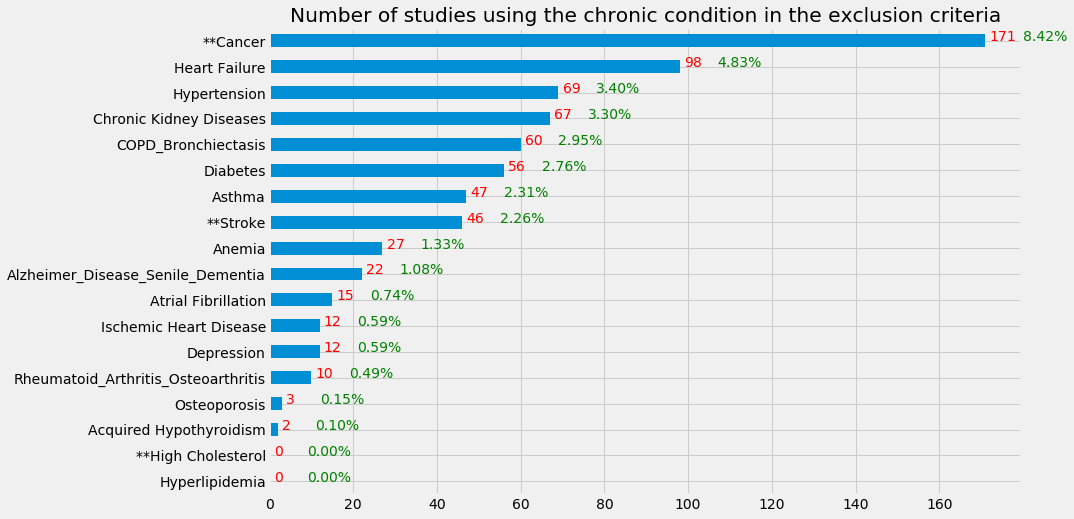

In [70]:
fig1 = plt.figure(figsize=(12,8))
dic.sort_values().plot.barh()
plt.title('Number of studies using the chronic condition in the exclusion criteria')
for i,v in enumerate(dic.sort_values()):
    plt.text(v + 1, i , str(v), color = 'red')
    plt.text(v + 9, i , ("{:.2%}".format(v/2031)), color = 'green')

In [71]:
# fig1.savefig("./data/common_disease.png", dpi=300, bbox_inches = "tight")